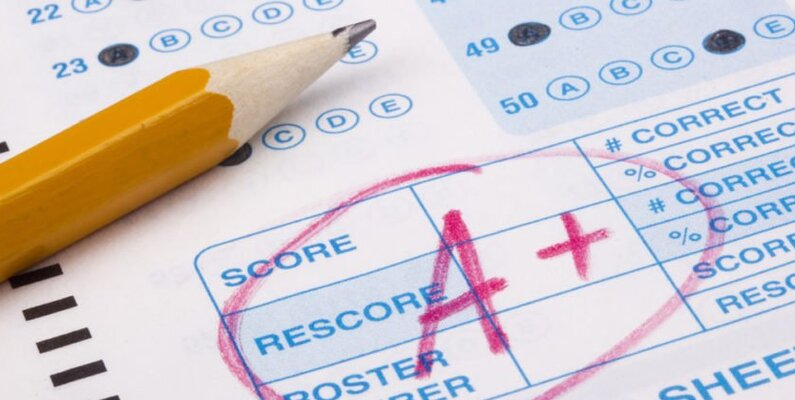

# **Project Tutorial: Student Exam Scores: Extended Dataset**

## I. **Project Description**: 

**This tutorial focuses on the data cleaning of student exam scores from a fictional public school**

## II. **Dataset Description**: 

**This dataset contains exam scores from three test scores of students at a fictional public school and a variety of personal and socio-economic factors that may have interaction affects  upon their performance.** [Datasource](https://www.kaggle.com/datasets/desalegngeb/students-exam-scores?select=Original_data_with_more_rows.csv)

## **1. Loading the Dependencies**

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
pd.set_option("display.max_columns", 200)
print("All libraries loaded successfully")

All libraries loaded successfully


## **2. Loading Dataset**

In [79]:
exam_score = pd.read_csv("Exams_scores_raw_data.csv")

## 3. Feature Enginering Process: **_Understanding Dataset_**
 * **Head or First 5 rows of data**
 * **Size of dataset: shape**
 * **Data columns**
 * **Data types and the number of these categorical: Nominal and Ordinal data types:**
 * **Information about dataset**
 * **Statistical description of dataset**
 * **Checking for NaN or missing values and sort in ascending order for clarity**

### **i. Head or First 5 rows of data**

In [80]:
exam_score.head(5)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75


### **ii. Size of dataset: shape**

In [81]:
exam_score.shape

(30641, 9)

#### **_Observation_**: **The exam score dataset has _30641 rows_ and _9 feature columns_**

### **iii. Data columns**

In [82]:
exam_score.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'MathScore', 'ReadingScore', 'WritingScore'],
      dtype='object')

### **iv. Data types and the number of these categorical: Nominal and Ordinal data types:**

In [83]:
exam_score.dtypes

Unnamed: 0       int64
Gender          object
EthnicGroup     object
ParentEduc      object
LunchType       object
TestPrep        object
MathScore        int64
ReadingScore     int64
WritingScore     int64
dtype: object

In [84]:
categorical_col = exam_score.select_dtypes(include = ["object"]).columns.to_list()

In [85]:
numerical_col = exam_score.select_dtypes(include = ["number"]).columns.to_list()

In [86]:
categorical_col

['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep']

In [87]:
len(categorical_col)

5

In [88]:
numerical_col

['Unnamed: 0', 'MathScore', 'ReadingScore', 'WritingScore']

In [89]:
len(numerical_col)

4

### **v. Information about Dataset**

In [90]:
exam_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    30641 non-null  int64 
 1   Gender        30641 non-null  object
 2   EthnicGroup   30641 non-null  object
 3   ParentEduc    30641 non-null  object
 4   LunchType     30641 non-null  object
 5   TestPrep      30641 non-null  object
 6   MathScore     30641 non-null  int64 
 7   ReadingScore  30641 non-null  int64 
 8   WritingScore  30641 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 2.1+ MB


#### **_Observation_**: **Each column of the dataset has exactly 30641 rows which implies that there are _no missing values_**

### **vi. Statistical description of Dataset**

In [91]:
exam_score.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,30641.0,499.556607,288.747894,0.0,249.0,500.0,750.0,999.0
MathScore,30641.0,66.749355,15.206049,0.0,56.0,67.0,78.0,100.0
ReadingScore,30641.0,69.624980,14.671572,10.0,60.0,70.0,80.0,100.0
WritingScore,30641.0,68.468327,15.307814,5.0,58.0,69.0,79.0,100.0


## 4. Feature Enginering Process: **_First Data Cleaning Steps_**

* **Deleting redundant columns.**
* **Renaming the columns.**
* **Dropping duplicates.**
* **Cleaning individual columns.**
* **Remove the NaN values from the dataset**
* **Check for some more Transformations**

### **i. Deleting redundant columns**.

In [92]:
exam_score.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'MathScore', 'ReadingScore', 'WritingScore'],
      dtype='object')

In [93]:
exam_score.drop(columns = ["Unnamed: 0", "EthnicGroup", "LunchType"], inplace = True, axis = 1)

In [94]:
exam_score.head(5)

,Gender,ParentEduc,TestPrep,MathScore,ReadingScore,WritingScore
0,female,bachelor's degree,none,72,72,74
1,female,some college,completed,69,90,88
2,female,master's degree,none,90,95,93
3,male,associate's degree,none,47,57,44
4,male,some college,none,76,78,75


### **ii. Renaming the columns**.

In [95]:
exam_score.rename({"TestPrep":"Test_Prep", "MathScore":"Math_Score", "ReadingScore":"Reading_Score","ParentEduc":"Parent_Education",
                   "WritingScore":"Writing_Score"}, inplace = True, axis = 1)

In [96]:
exam_score.head(5)

,Gender,Parent_Education,Test_Prep,Math_Score,Reading_Score,Writing_Score
0,female,bachelor's degree,none,72,72,74
1,female,some college,completed,69,90,88
2,female,master's degree,none,90,95,93
3,male,associate's degree,none,47,57,44
4,male,some college,none,76,78,75


### **iii. Dropping Duplicates.**

In [97]:
exam_score.duplicated().value_counts()

False    29285
True      1356
Name: count, dtype: int64

In [98]:
exam_score[exam_score.duplicated(keep ="first")]

,Gender,Parent_Education,Test_Prep,Math_Score,Reading_Score,Writing_Score
613,female,associate's degree,none,65,77,74
692,female,bachelor's degree,completed,66,74,81
1046,male,some college,none,58,49,42
1059,female,some college,none,69,74,74
1482,male,associate's degree,completed,73,68,72
...,...,...,...,...,...,...
30568,female,some college,none,54,55,63
30582,male,bachelor's degree,none,65,60,62
30600,male,some college,none,73,60,57
30619,female,associate's degree,none,54,64,69


In [99]:
exam_score.query('Gender == "male"')

,Gender,Parent_Education,Test_Prep,Math_Score,Reading_Score,Writing_Score
3,male,associate's degree,none,47,57,44
4,male,some college,none,76,78,75
7,male,some college,none,40,43,39
8,male,high school,completed,64,64,67
10,male,associate's degree,none,58,54,52
...,...,...,...,...,...,...
30635,male,some high school,completed,64,59,64
30636,male,some high school,none,56,47,51
30637,male,associate's degree,none,74,75,72
30638,male,some college,none,36,29,27


#### **_Observation_**: **Duplicates exists in the _Gender_ and _Test_Prep_ but have different _Test_scores and so we do not drop them**

### **iv. Cleaning individual columns:**

In [100]:
exam_score.loc[exam_score.duplicated(subset = ["Gender", "Test_Prep"])]

,Gender,Parent_Education,Test_Prep,Math_Score,Reading_Score,Writing_Score
2,female,master's degree,none,90,95,93
4,male,some college,none,76,78,75
5,female,associate's degree,none,71,83,78
6,female,some college,completed,88,95,92
7,male,some college,none,40,43,39
...,...,...,...,...,...,...
30636,male,some high school,none,56,47,51
30637,male,associate's degree,none,74,75,72
30638,male,some college,none,36,29,27
30639,male,some high school,completed,43,34,39


#### **_Obervation_**: **All duplicates in the feature columns: _Gender and Test_Prep_ will be maintained since the Test_scores are different**

### **v. Check for some more Transformations**

#### a. **We convert the Gender column: Female: F and male: M**

In [101]:
exam_score["Gender"] = exam_score["Gender"].apply(lambda x: "F" if x == "female" else "M")

In [102]:
exam_score.head(5)

,Gender,Parent_Education,Test_Prep,Math_Score,Reading_Score,Writing_Score
0,F,bachelor's degree,none,72,72,74
1,F,some college,completed,69,90,88
2,F,master's degree,none,90,95,93
3,M,associate's degree,none,47,57,44
4,M,some college,none,76,78,75


In [103]:
exam_score["Test_Prep"].value_counts()

Test_Prep
none         20068
completed    10573
Name: count, dtype: int64

#### b. **We convert the Test_Prep column: none: N and completed: C**

In [104]:
exam_score["Test_Prep"] = exam_score["Test_Prep"].apply(lambda x: "N" if x == "none" else "C")

In [105]:
exam_score.head(10)

,Gender,Parent_Education,Test_Prep,Math_Score,Reading_Score,Writing_Score
0,F,bachelor's degree,N,72,72,74
1,F,some college,C,69,90,88
2,F,master's degree,N,90,95,93
3,M,associate's degree,N,47,57,44
4,M,some college,N,76,78,75
5,F,associate's degree,N,71,83,78
6,F,some college,C,88,95,92
7,M,some college,N,40,43,39
8,M,high school,C,64,64,67
9,F,high school,N,38,60,50


In [106]:
exam_score["Total_score"] = exam_score["Math_Score"] + exam_score["Reading_Score"] + exam_score["Writing_Score"]

In [107]:
exam_score.head(5)

,Gender,Parent_Education,Test_Prep,Math_Score,Reading_Score,Writing_Score,Total_score
0,F,bachelor's degree,N,72,72,74,218
1,F,some college,C,69,90,88,247
2,F,master's degree,N,90,95,93,278
3,M,associate's degree,N,47,57,44,148
4,M,some college,N,76,78,75,229


#### **We perform a check on the Total_score to Grade: Success if Total_score > 240 else Fail**

In [108]:
exam_score["Grade"] = exam_score["Total_score"].apply(lambda x: "Success" if x > 240 else "Fail")

In [109]:
exam_score.head(5)

,Gender,Parent_Education,Test_Prep,Math_Score,Reading_Score,Writing_Score,Total_score,Grade
0,F,bachelor's degree,N,72,72,74,218,Fail
1,F,some college,C,69,90,88,247,Success
2,F,master's degree,N,90,95,93,278,Success
3,M,associate's degree,N,47,57,44,148,Fail
4,M,some college,N,76,78,75,229,Fail


#### **Checking for the number of successes**

In [110]:
exam_score["Grade"].value_counts()

Grade
Fail       23939
Success     6702
Name: count, dtype: int64

In [111]:
exam_score[["Grade", "Test_Prep"]].value_counts()

Grade    Test_Prep
Fail     N            16729
         C             7210
Success  C             3363
         N             3339
Name: count, dtype: int64

#### **_Observation_**: Number of students who **_Failed_** without Test_Prep shows **16729 student** and those with Test_Prep shows **7210 students**
#### Number of students with **_Success_** and Test_Prep shows **3363 students** and those without Test_Prep shows **3339 students**

#### **_Deduction_**: **Test_Prep is _very important_ though does not gurantee success**

### **vi. Exporting the cleaned data**

In [113]:
exam_score.to_csv("Cleaned_Exam_Scores.csv", index = False)

In [114]:
# Reading first few rows of cleaned dataset

In [115]:
Cleaned_Exam_Scores = pd.read_csv("Cleaned_Exam_Scores.csv")

In [116]:
Cleaned_Exam_Scores.head(5)

,Gender,Parent_Education,Test_Prep,Math_Score,Reading_Score,Writing_Score,Total_score,Grade
0,F,bachelor's degree,N,72,72,74,218,Fail
1,F,some college,C,69,90,88,247,Success
2,F,master's degree,N,90,95,93,278,Success
3,M,associate's degree,N,47,57,44,148,Fail
4,M,some college,N,76,78,75,229,Fail
